### For this exercise SPY500 will be forecasted using temporal variables. The goal is not to create a predictive model but produce code for time variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

### Read Data

In [2]:
raw_input = pd.read_csv("SPY500.csv")

### Check Data

In [3]:
raw_input.head()

,Date,Adj Close
0,2/1/1993,27.027504
1,2/2/1993,27.084740
2,2/3/1993,27.371080
3,2/4/1993,27.485609
4,2/5/1993,27.466482


In [4]:
raw_input.tail()

,Date,Adj Close
9583,4/29/2019,293.869995
9584,4/30/2019,294.019989
9585,5/1/2019,291.809998
9586,5/2/2019,291.179993
9587,5/3/2019,294.029999


### Input Date column name and Adj Close (y) column name

In [5]:
date_col = "Date"
y_col = "Adj Close"

### Convert Date to Datetime

In [6]:
raw_input[date_col] = pd.to_datetime(raw_input[date_col])
raw_input = raw_input.set_index(date_col)

### Plot Data

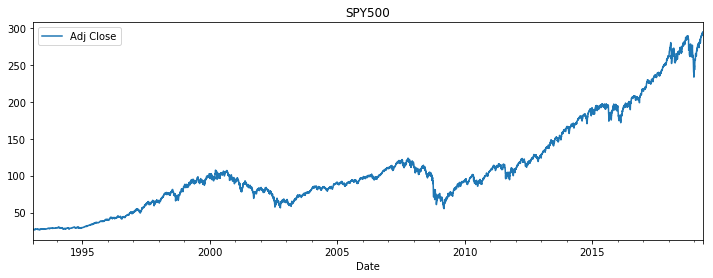

In [7]:
raw_input.plot(title = 'SPY500',figsize=(12,4))

### Detrend Data

In [8]:
raw_input['detrended_y'] = raw_input[y_col]/raw_input[y_col].shift(1)
raw_input.dropna(inplace=True,axis=0)
raw_input.drop(y_col,axis=1,inplace=True)

### Plot Detrended Data

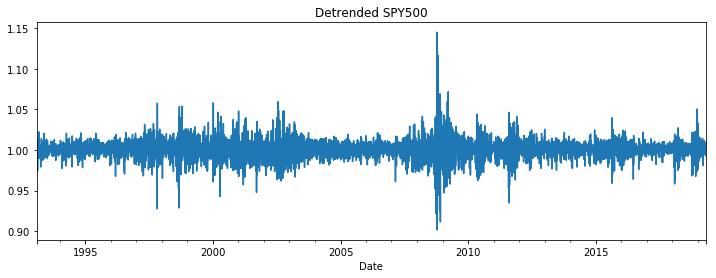

In [9]:
raw_input['detrended_y'].plot(title = 'Detrended SPY500',figsize=(12,4))

### Plot the Distribution of Target Variable

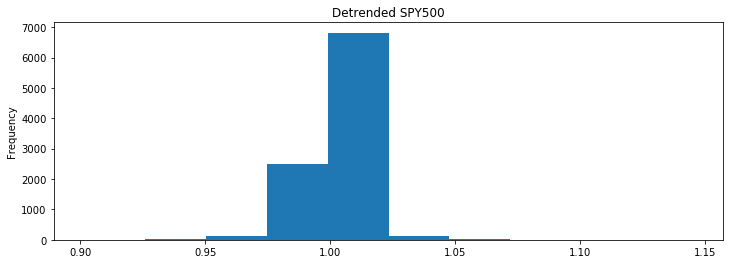

In [10]:
raw_input['detrended_y'].plot(title = 'Detrended SPY500',figsize=(12,4),kind = 'hist')

### Temporal Variable Functions:

In [11]:
def av_weekday(df):
    '''
    Add Two Types of Weekday Variable to DataFrame:
    1. Binary
    2. Ordinal (Monday is zero)
    
    One can be dropper under the user's discretion.
    '''
    
    df['weekday'] = df.index.weekday
    
    df['sun'] = (df['weekday'] == 6).astype(int)
    df['mon'] = (df['weekday'] == 0).astype(int)
    df['tue'] = (df['weekday'] == 1).astype(int)
    df['wed'] = (df['weekday'] == 2).astype(int)
    df['thu'] = (df['weekday'] == 3).astype(int)
    df['fri'] = (df['weekday'] == 4).astype(int)
    df['sat'] = (df['weekday'] == 5).astype(int)
    
    df.drop('weekday',axis=1,inplace=True)
    
    return df

In [12]:
def av_month(df):
    '''
    Add Two Types of Month Variable to DataFrame:
    1. Binary
    2. Ordinal (Monday is zero)
    
    One can be dropper under the user's discretion.
    '''
    
    df['month'] = df.index.month
    
    df['jan'] = (df['month'] == 1).astype(int)
    df['feb'] = (df['month'] == 2).astype(int)
    df['mar'] = (df['month'] == 3).astype(int)
    df['apr'] = (df['month'] == 4).astype(int)
    df['may'] = (df['month'] == 5).astype(int)
    df['jun'] = (df['month'] == 6).astype(int)
    df['jul'] = (df['month'] == 7).astype(int)
    df['aug'] = (df['month'] == 8).astype(int)
    df['sep'] = (df['month'] == 9).astype(int)
    df['oct'] = (df['month'] == 10).astype(int)
    df['nov'] = (df['month'] == 11).astype(int)
    df['dec'] = (df['month'] == 12).astype(int)
    
    return df

In [13]:
def av_dayofmonth(df):
    '''
    Add Two Types of Day of Month Variable to DataFrame:
    1. Binary
    2. Ordinal (Monday is zero)
    
    One can be dropper under the user's discretion.
    '''
    
    df['dayofmonth'] = df.index.day
    
    for day in range(1,32):
        df['dayofmonth_' + str(day).zfill(2)] = (df['dayofmonth'] == day).astype(int)
        
    df['days_in_month'] = df.index.daysinmonth
    
    return df

In [14]:
def av_weekofyear(df):
    '''
    Add week of year variable
    '''

    df['weekofyear'] = df.index.week
    
    return df

In [15]:
def av_weekofmonth(df):
    '''
    Add week of month variable in binary.
    '''
    df['weekofmonth_1'] = (df['dayofmonth']<8).astype(int)
    df['weekofmonth_2'] = ((7 < df['dayofmonth']) & (df['dayofmonth'] < 15)).astype(int)
    df['weekofmonth_3'] = ((14 < df['dayofmonth']) & (df['dayofmonth'] < 22)).astype(int)
    df['weekofmonth_4'] = ((21 < df['dayofmonth']) & (df['dayofmonth'] < 29)).astype(int)
    df['weekofmonth_5'] = ((28 < df['dayofmonth']) & (df['dayofmonth'] <= 31)).astype(int)
    
    return df

In [16]:
def av_weekday_ordinal(df):
    '''
    Add the ordinal weekday
    '''
        
    for day in ['sun','mon','tue','wed','thu','fri','sat']:
        df[str(day) + "_1"] = ((df[day] == 1) & (df['dayofmonth'] < 8)).astype(int)
        df[str(day) + "_2"] = ((df[day] == 1) & (8 <= df['dayofmonth']) & (df['dayofmonth'] < 15)).astype(int)
        df[str(day) + "_3"] = ((df[day] == 1) & (15 <= df['dayofmonth']) & (df['dayofmonth'] < 22)).astype(int)
        df[str(day) + "_4"] = ((df[day] == 1) & (22 <= df['dayofmonth']) & (df['dayofmonth'] < 29)).astype(int)
        df[str(day) + "_5"] = ((df[day] == 1) & (29 <= df['dayofmonth']) & (df['dayofmonth'] <= 31)).astype(int)
        
    return df
    
    

In [17]:
def av_weekday_ordinal2(df):
    '''
    Add the week number based on the week of month. Week ending on Saturday.
    '''
        
    df['sun2_1'] = ((df['sun'] == 1) & (df['dayofmonth'] == 1)).astype(int)
    df['sun2_2'] = ((df['sun'] == 1) & (2 <= df['dayofmonth']) & (df['dayofmonth'] < 9)).astype(int)
    df['sun2_3'] = ((df['sun'] == 1) & (9 <= df['dayofmonth']) & (df['dayofmonth'] < 16)).astype(int)
    df['sun2_4'] = ((df['sun'] == 1) & (16 <= df['dayofmonth']) & (df['dayofmonth'] < 23)).astype(int)
    df['sun2_5'] = ((df['sun'] == 1) & (23 <= df['dayofmonth']) & (df['dayofmonth'] < 30)).astype(int)
    df['sun2_6'] = ((df['sun'] == 1) & (30 <= df['dayofmonth']) & (df['dayofmonth'] <= 31)).astype(int)
    
    df['mon2_1'] = ((df['mon'] == 1) & (1 <= df['dayofmonth']) & (df['dayofmonth'] < 3)).astype(int)
    df['mon2_2'] = ((df['mon'] == 1) & (3 <= df['dayofmonth']) & (df['dayofmonth'] < 10)).astype(int)
    df['mon2_3'] = ((df['mon'] == 1) & (10 <= df['dayofmonth']) & (df['dayofmonth'] < 17)).astype(int)
    df['mon2_4'] = ((df['mon'] == 1) & (17 <= df['dayofmonth']) & (df['dayofmonth'] < 24)).astype(int)
    df['mon2_5'] = ((df['mon'] == 1) & (24 <= df['dayofmonth']) & (df['dayofmonth'] < 31)).astype(int)
    df['mon2_6'] = ((df['mon'] == 1) & (df['dayofmonth'] == 31)).astype(int)
    
    df['tue2_1'] = ((df['tue'] == 1) & (1 <= df['dayofmonth']) & (df['dayofmonth'] < 4)).astype(int)
    df['tue2_2'] = ((df['tue'] == 1) & (4 <= df['dayofmonth']) & (df['dayofmonth'] < 11)).astype(int)
    df['tue2_3'] = ((df['tue'] == 1) & (11 <= df['dayofmonth']) & (df['dayofmonth'] < 18)).astype(int)
    df['tue2_4'] = ((df['tue'] == 1) & (18 <= df['dayofmonth']) & (df['dayofmonth'] < 25)).astype(int)
    df['tue2_5'] = ((df['tue'] == 1) & (25 <= df['dayofmonth']) & (df['dayofmonth'] <= 31)).astype(int)
    
    df['wed2_1'] = ((df['wed'] == 1) & (1 <= df['dayofmonth']) & (df['dayofmonth'] < 5)).astype(int)
    df['wed2_2'] = ((df['wed'] == 1) & (5 <= df['dayofmonth']) & (df['dayofmonth'] < 12)).astype(int)
    df['wed2_3'] = ((df['wed'] == 1) & (12 <= df['dayofmonth']) & (df['dayofmonth'] < 19)).astype(int)
    df['wed2_4'] = ((df['wed'] == 1) & (19 <= df['dayofmonth']) & (df['dayofmonth'] < 26)).astype(int)
    df['wed2_5'] = ((df['wed'] == 1) & (26 <= df['dayofmonth']) & (df['dayofmonth'] <= 31)).astype(int)
    
    df['thu2_1'] = ((df['thu'] == 1) & (1 <= df['dayofmonth']) & (df['dayofmonth'] < 6)).astype(int)
    df['thu2_2'] = ((df['thu'] == 1) & (6 <= df['dayofmonth']) & (df['dayofmonth'] < 13)).astype(int)
    df['thu2_3'] = ((df['thu'] == 1) & (13 <= df['dayofmonth']) & (df['dayofmonth'] < 20)).astype(int)
    df['thu2_4'] = ((df['thu'] == 1) & (20 <= df['dayofmonth']) & (df['dayofmonth'] < 27)).astype(int)
    df['thu2_5'] = ((df['thu'] == 1) & (27 <= df['dayofmonth']) & (df['dayofmonth'] <= 31)).astype(int)
                    
    df['fri2_1'] = ((df['fri'] == 1) & (1 <= df['dayofmonth']) & (df['dayofmonth'] < 7)).astype(int)
    df['fri2_2'] = ((df['fri'] == 1) & (7 <= df['dayofmonth']) & (df['dayofmonth'] < 14)).astype(int)
    df['fri2_3'] = ((df['fri'] == 1) & (14 <= df['dayofmonth']) & (df['dayofmonth'] < 21)).astype(int)
    df['fri2_4'] = ((df['fri'] == 1) & (21 <= df['dayofmonth']) & (df['dayofmonth'] < 28)).astype(int)
    df['fri2_5'] = ((df['fri'] == 1) & (28 <= df['dayofmonth']) & (df['dayofmonth'] <= 31)).astype(int)
                    
    df['sat2_1'] = ((df['sat'] == 1) & (1 <= df['dayofmonth']) & (df['dayofmonth'] < 8)).astype(int)
    df['sat2_2'] = ((df['sat'] == 1) & (8 <= df['dayofmonth']) & (df['dayofmonth'] < 15)).astype(int)
    df['sat2_3'] = ((df['sat'] == 1) & (15 <= df['dayofmonth']) & (df['dayofmonth'] < 22)).astype(int)
    df['sat2_4'] = ((df['sat'] == 1) & (22 <= df['dayofmonth']) & (df['dayofmonth'] < 29)).astype(int)
    df['sat2_5'] = ((df['sat'] == 1) & (29 <= df['dayofmonth']) & (df['dayofmonth'] <= 31)).astype(int)
    
        
    return df

In [18]:
def av_minor_holidays(df):
    '''
    Add Minor Holidays to df
    '''
    
    df['valentines'] = ((df['feb'] == 1) & (df['dayofmonth'] == 14)).astype(int)
    df['mothers'] = ((df['may'] == 1) & (df['weekofmonth_2'] == 2) & (df['sun'] == 1)).astype(int)
    
    
    return df

In [19]:
def av_federal_holiday(df):
    '''
    Add the Federal Holidays:
    
    new_year - Jan 1st
    christmas - Dec 25
    independence - Jul 4
    veterans - Nov 11
    
    thanksgiving - 4th thu of Nov
    mlk - 3rd mon of Jan
    presidents - 3rd mon of feb
    labor - 1st mon of sep
    columbus - 2nd mon of oct
    memorial day - last monday of may
    '''
    
    df['new_year'] = ((df['jan'] == 1) & (df['dayofmonth'] == 1)).astype(int)
    df['christmas'] = ((df['dec'] == 1) & (df['dayofmonth'] == 25)).astype(int)
    df['independence'] = ((df['jul'] == 1) & (df['dayofmonth'] == 4)).astype(int)
    df['veterans'] = ((df['nov'] == 1) & (df['dayofmonth'] == 11)).astype(int)
    
    df['thanksgiving'] = ((df['nov'] == 1) & (df['thu_4'] == 1)).astype(int)
    df['mlk'] = ((df['jan'] == 1) & (df['mon_3'] == 1)).astype(int)
    df['presidents'] = ((df['feb'] == 1) & (df['mon_3'] == 1)).astype(int)
    df['labor'] = ((df['sep'] == 1) & (df['mon_1'] == 1)).astype(int)
    df['columbus'] = ((df['oct'] == 1) & (df['mon_2'] == 1)).astype(int)
    
    df['memorial'] = ((df['may'] == 1) & (df['mon'] == 1) & (25 <= df['dayofmonth']) & (df['dayofmonth'] <= 31) ).astype(int)
    
    federal_holidays = ['new_year','christmas','independence','veterans','thanksgiving','mlk','presidents','labor',
                       'columbus','memorial']
    
    df['federal_holidays'] = df[federal_holidays].sum(axis=1).values
    

    return df,federal_holidays
    

In [20]:
good_friday = [ '3-29-2024',
                '4-7-2023',
                '4-15-2022',
                '4-2-2021',
                '4-10-2020',
                '4-19-2019',
                '3-30-2018',
                '4-14-2017',
                '3-25-2016',
                '4-3-2015',
                '4-18-2014',
                '3-29-2013',
                '4-6-2012',
                '4-22-2011',
                '4-2-2010',
                '4-10-2009',
                '3-21-2008',
                '4-6-2007',
                '4-14-2006',
                '3-25-2005',
                '4-9-2004',
                '4-18-2003',
                '3-29-2002',
                '4-13-2001',
                '4-21-2000',
                '4-2-1999',
                '4-10-1998',
                '3-28-1997',
                '4-5-1996',
                '4-14-1995',
                '4-1-1994',
                '4-9-1993',
                '4-17-1992',
                '3-29-1991',
                '4-13-1990']

easter = ['5-31-1991',
        '4-19-1992',
        '4-11-1993',
        '4-3-1994',
        '4-16-1995',
        '4-7-1996',
        '5-30-1997',
        '4-12-1998',
        '4-4-1999',
        '4-23-2000',
        '4-15-2001',
        '5-31-2002',
        '4-20-2003',
        '4-11-2004',
        '5-27-2005',
        '4-16-2006',
        '4-8-2007',
        '5-23-2008',
        '4-12-2009',
        '4-4-2010',
        '4-24-2011',
        '4-8-2012',
        '5-31-2013',
        '4-20-2014',
        '4-5-2015',
        '5-27-2016',
        '4-16-2017',
        '4-1-2018',
        '4-21-2019',
        '4-12-2020',
        '4-4-2021',
        '4-17-2022',
        '4-9-2023',
        '5-31-2024',
]
no_pattern_holidays = {'good_friday':good_friday,
                      'easter':easter}

In [21]:
def list_of_dates_to_column(df,list_of_dates,column_name):
    '''
    Turns a list of list of dates into a column variables. This can be used for special days that does not any rules (or unknown) in terms of occurance.
    '''
    
    df[column_name] = 0
    
    for date in list_of_dates:
        df[column_name] = df[column_name] + pd.Series((df.reset_index()['Date'] == date).astype(int)).values

    return df

In [22]:
def av_stock_market_holiday(df):
    '''
    Add the stock market Holidays:
    
    new_year - Jan 1st
    christmas - Dec 25
    independence - Jul 4
    veterans - Nov 11
    
    thanksgiving - 4th thu of Nov
    mlk - 3rd mon of Jan
    presidents - 3rd mon of feb
    labor - 1st mon of sep
    columbus - 2nd mon of oct
    memorial day - last monday of may
    '''
    
    df['new_year'] = ((df['jan'] == 1) & (df['dayofmonth'] == 1)).astype(int)
    df['christmas'] = ((df['dec'] == 1) & (df['dayofmonth'] == 25)).astype(int)
    df['independence'] = ((df['jul'] == 1) & (df['dayofmonth'] == 4)).astype(int)
    df['veterans'] = ((df['nov'] == 1) & (df['dayofmonth'] == 11)).astype(int)
    
    df['thanksgiving'] = ((df['nov'] == 1) & (df['thu_4'] == 1)).astype(int)
    df['mlk'] = ((df['jan'] == 1) & (df['mon_3'] == 1)).astype(int)
    df['presidents'] = ((df['feb'] == 1) & (df['mon_3'] == 1)).astype(int)
    df['labor'] = ((df['sep'] == 1) & (df['mon_1'] == 1)).astype(int)
    df['columbus'] = ((df['oct'] == 1) & (df['mon_2'] == 1)).astype(int)
    
    df['memorial'] = ((df['may'] == 1) & (df['mon'] == 1) & (25 <= df['dayofmonth']) & (df['dayofmonth'] <= 31) ).astype(int)
    
        
    return df
    

In [23]:
def av_daysinmonth(df):
    '''
    Add days in month
    '''
    df['days_30'] = df['apr'] + df['jun'] + df['sep'] + df['nov']    
    df['days_31'] = df['jan'] + df['mar'] + df['may'] + df['jul'] + df['aug'] + df['oct'] + df['dec']     
    
    return df

In [24]:
def av_seq(df,date_col):
    '''
    Add variable sequence to put  more weightage in more recent data
    '''
    df['seq'] = df.reset_index().index
    df['seq2'] = df['seq']**2
    df['seq3'] = df['seq']**3
    
    #df = df.set_index(date_col)
    
    return df

In [25]:
def av_quarter(df):
    
    '''
    Add quater of the year in the df
    '''
    
    df['quarter'] = df.index.quarter.astype(int)
    
    return df

In [26]:
def av_leap_year(df):
    '''
    Add Leap Year in the df
    '''
    
    df['quarter'] = df.index.is_leap_year.astype(int)
    
    return df

In [27]:
def av_startof_endof(df):
    '''
    Add the start and end of the month
    
    '''
    
    df['endof_month'] = df.index.is_month_end.astype(int)
    
    df['startof_quarter'] = df.index.is_quarter_start.astype(int)
    df['endof_quarter'] = df.index.is_quarter_end.astype(int)
    
    
    return df

In [28]:
day_before = {'endof_month':2,
             'good_friday':2,
             'new_year':2,
             'christmas':2,
             'independence':2,
             'veterans':2,
             'thanksgiving':2,
             'mlk':2,
             'presidents':2,
             'labor':2,
             'columbus':2,
             'memorial':2,
              'federal_holidays':2
             }

In [29]:
day_after = {'endof_month':2,
             'good_friday':2,
             'new_year':2,
             'christmas':2,
             'independence':2,
             'veterans':2,
             'thanksgiving':2,
             'mlk':2,
             'presidents':2,
             'labor':2,
             'columbus':2,
             'memorial':2,
             'federal_holidays':2
             }

In [30]:
def av_day_before_after(day_before,day_after,df):
    '''
    Creates day before/after based on the day_before and day_after dictionary
    
    '''
    day_before_column_names = []
    
    for key, value in day_after.items():
        for v in range(value):
            col_name = str(key) + "_+" + str(v+1)
            df[col_name] = df[key].shift(v+1)
            day_before_column_names.append(col_name)
            
            
    for key, value in day_before.items():
        for v in range(value):
            col_name = str(key) + "_-" + str(v+1)
            df[col_name] = df[key].shift(-v-1)
            day_before_column_names.append(col_name)
    df.fillna(0,inplace=True)
    return day_before_column_names, df

In [31]:
def av_lags(df,y_col,day_lag,week_lag):
    '''
    Creates Lag Variables and Weekly rolling windows
    '''
    
    for lag in range(1,day_lag):
        df['Lags_' + str(lag)] = df[y_col].shift(lag)

    for lag in range(1,week_lag):
        df['Lag_week_' + str(lag)] = df[y_col].shift(7*lag)
        
    for week in range(7,56,7):
        df['Rolling_min_' + str(week)] = df[y_col].rolling(week).min()
        df['Rolling_max_' + str(week)] = df[y_col].rolling(week).max()
        df['Rolling_sum_' + str(week)] = df[y_col].rolling(week).sum()
        df['Rolling_std_' + str(week)] = df[y_col].rolling(week).std()
    
    
    df.dropna(inplace=True)
    
    
    return df

In [32]:
def av_stock_market_closed(df):
    '''
    Adds variables where in the stock market is closed
    '''
    
    df['stock_market_closed'] = df['new_year'] + df['mlk'] + df['presidents'] + df['good_friday'] + df['memorial'] + \
                                df['independence'] + df['labor'] + df['thanksgiving'] + df['christmas']
    
    return df

In [33]:
def av_holiday_impact(df):
    '''
    Adds variables which indicates holiday impact through:
    1. Number of states observed with government offices closed
    2. Percent of americans celebrating
    3. Percent of Businesses Giving Paid Time off
    
    '''
    #Number of states observed with government offices closed
    
    government_offices_closed_list = []
    
    government_offices_closed_dict = {
        'christmas':50,
        'christmas_+1':6,
        'christmas_-1':11,
        'new_year':50,
        'independence':50,
        'veterans':50,
        'mlk':45,
        'presidents':38,
        'labor':50,
        'thanksgiving':50,
        'thanksgiving_+1':18,
        'columbus':23,
        'memorial':50
    }
    
    for key in government_offices_closed_dict:
        df[str(key) + '_gov_ofc_closed'] = df[key]*government_offices_closed_dict[key]
        government_offices_closed_list.append(str(key) + '_gov_ofc_closed')
        
    df['government_offices_closed'] = df[government_offices_closed_list].sum(axis=1)/50
    
    df.drop(government_offices_closed_list,axis=1,inplace=True)
    
    #Percent of americans celebrating
    percent_of_americans_celebrating_list = []
    
    percent_of_americans_celebrating_dict = {
        'christmas':.95,
        'new_year':.75,
        'new_year_-1':.4,
        #'mothers':.85,
        'easter':.8,
        'independence':.8,
        'veterans':.43,
        'mlk':.26,
        'presidents':.52,
        'labor':.55,
        'thanksgiving':.9,
        'columbus':.23,
        'valentines':.55,
        'memorial':.21,
        'columbus':.1,
    }
    
    for key in percent_of_americans_celebrating_dict:
        df[str(key) + '_percent_of_americans_celebrating'] = df[key]*percent_of_americans_celebrating_dict[key]
        percent_of_americans_celebrating_list.append(str(key) + '_percent_of_americans_celebrating')
    
    df['percent_of_americans_celebrating'] = df[percent_of_americans_celebrating_list].sum(axis=1)
    df.drop(percent_of_americans_celebrating_list,axis=1,inplace=True)
    
    #Percent of Businesses Giving Paid Time off
    percent_of_businesses_giving_paid_time_off_list = []
    
    percent_of_businesses_giving_paid_time_off_dict = {
        'christmas':.94,
        'christmas_-2':.33,
        'christmas_-1':.78,
        'christmas_+1':.5,
        'new_year':.96,
        'new_year_-1':.71,
        'independence':.97,
        'veterans':.20,
        'mlk':.35,
        'presidents':.35,
        'labor':.95,
        'thanksgiving':.97,
        'thanksgiving_+1':.7,
        'columbus':.15,
        'memorial':.95,
    }
    
    for key in percent_of_businesses_giving_paid_time_off_dict:
        df[str(key) + '_percent_of_businesses_giving_paid_time_off'] = df[key]*percent_of_businesses_giving_paid_time_off_dict[key]
        percent_of_businesses_giving_paid_time_off_list.append(str(key) + '_percent_of_businesses_giving_paid_time_off')
    
    df['percent_of_businesses_giving_paid_time_off'] = df[percent_of_businesses_giving_paid_time_off_list].sum(axis=1)
    df.drop(percent_of_businesses_giving_paid_time_off_list,axis=1,inplace=True)
    
    
    return df

In [34]:
def av_observed_federal_holiday(df):
    
    '''
    Add variable for oberved federal holiday
    '''
    
    df['observerd_federal_holiday'] = ((df['federal_holidays_-1'] == 1) & (df['fri'] == 1)).astype(int)
    
    df['observerd_federal_holiday'] = ((df['federal_holidays_+1'] == 1) & (df['mon'] == 1)).astype(int)
    
    df['federal_holidays'] = df['federal_holidays'] + df['observerd_federal_holiday']
    
    
    return df

In [35]:
def av(raw_input,no_pattern_holidays):
    '''
    Use all AV functions
    '''
    
    raw_input = av_weekday(raw_input)
    raw_input = av_month(raw_input)
    raw_input = av_dayofmonth(raw_input)
    raw_input = av_weekofyear(raw_input)
    raw_input = av_weekofmonth(raw_input)
    raw_input = av_weekday_ordinal(raw_input)
    raw_input = av_minor_holidays(raw_input)
    raw_input,federal_holidays = av_federal_holiday(raw_input)
    raw_input = av_weekday_ordinal2(raw_input)
    raw_input = av_daysinmonth(raw_input)
    raw_input = av_seq(raw_input,date_col)
    raw_input = av_startof_endof(raw_input)

    for no_pattern_holiday in no_pattern_holidays:
        raw_input = list_of_dates_to_column(raw_input,no_pattern_holidays[no_pattern_holiday],no_pattern_holiday)

    raw_input = av_quarter(raw_input)
    raw_input = av_leap_year(raw_input)
    day_before_column_names, raw_input = av_day_before_after(day_before,day_after,raw_input)
    raw_input = av_lags(raw_input,'detrended_y',day_lag = 15,week_lag=3)
    raw_input = av_stock_market_closed(raw_input)
    raw_input = av_observed_federal_holiday(raw_input)
    raw_input = av_holiday_impact(raw_input)
    
    df = raw_input
    
    return df

### Apply Function to Data

In [36]:
df = av(raw_input,no_pattern_holidays)

### Check Number of Columns

In [37]:
print(str(df.shape[1]) + ' total columns')

257 total columns


### Inspect Output Dataframe

In [38]:
df.head()

,detrended_y,sun,mon,tue,wed,thu,fri,sat,month,jan,...,Rolling_std_42,Rolling_min_49,Rolling_max_49,Rolling_sum_49,Rolling_std_49,stock_market_closed,observerd_federal_holiday,government_offices_closed,percent_of_americans_celebrating,percent_of_businesses_giving_paid_time_off
Date,,,,,,,,,,,,,,,,,,,,,
1993-03-22,0.994448,0,1,0,0,0,0,0,3,0,...,0.007010,0.974773,1.022346,49.017720,0.006682,0,0,0.0,0.0,0.0
1993-03-23,1.002095,0,0,1,0,0,0,0,3,0,...,0.006929,0.974773,1.022346,49.017697,0.006681,0,0,0.0,0.0,0.0
1993-03-24,1.000000,0,0,0,1,0,0,0,3,0,...,0.006927,0.974773,1.022346,49.007125,0.006513,0,0,0.0,0.0,0.0
1993-03-25,1.006266,0,0,0,0,1,0,0,3,0,...,0.006953,0.974773,1.022346,49.009207,0.006547,0,0,0.0,0.0,0.0
1993-03-26,0.994464,0,0,0,0,0,1,0,3,0,...,0.006901,0.974773,1.022346,49.004366,0.006597,0,0,0.0,0.0,0.0


In [39]:
df.tail()

,detrended_y,sun,mon,tue,wed,thu,fri,sat,month,jan,...,Rolling_std_42,Rolling_min_49,Rolling_max_49,Rolling_sum_49,Rolling_std_49,stock_market_closed,observerd_federal_holiday,government_offices_closed,percent_of_americans_celebrating,percent_of_businesses_giving_paid_time_off
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-29,1.001568,0,1,0,0,0,0,0,4,0,...,0.004903,0.980754,1.011859,49.058891,0.004677,0,0,0.0,0.0,0.0
2019-04-30,1.000510,0,0,1,0,0,0,0,4,0,...,0.004902,0.980754,1.011859,49.055630,0.004663,0,0,0.0,0.0,0.0
2019-05-01,0.992484,0,0,0,1,0,0,0,5,0,...,0.005039,0.980754,1.011859,49.041495,0.004753,0,0,0.0,0.0,0.0
2019-05-02,0.997841,0,0,0,0,1,0,0,5,0,...,0.004780,0.980754,1.011859,49.039975,0.004768,0,0,0.0,0.0,0.0
2019-05-03,1.009788,0,0,0,0,0,1,0,5,0,...,0.003859,0.980754,1.011859,49.044823,0.004903,0,0,0.0,0.0,0.0


### Select Train/Test date threshold

In [40]:
threshold = '2018-01-01'

### Divide Data into train and test

In [41]:
test = df[df.index>=threshold]
train = df[df.index<threshold]

### Split Train and Test into X and y

In [42]:
X_train =  train.drop('detrended_y',axis=1).values
y_train = train['detrended_y'].values

In [43]:
X_test =  test.drop('detrended_y',axis=1).values
y_test = test['detrended_y'].values

### Use Random Forest Model

In [44]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

C:\Users\nickj\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Feature Importance

In [45]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 225 (0.163376)
2. feature 207 (0.073700)
3. feature 210 (0.050710)
4. feature 224 (0.041456)
5. feature 211 (0.041172)
6. feature 226 (0.040318)
7. feature 208 (0.039953)
8. feature 223 (0.038399)
9. feature 212 (0.037607)
10. feature 209 (0.033234)
11. feature 213 (0.024590)
12. feature 222 (0.023815)
13. feature 221 (0.021180)
14. feature 220 (0.018635)
15. feature 241 (0.016840)
16. feature 219 (0.016662)
17. feature 214 (0.016210)
18. feature 233 (0.015100)
19. feature 246 (0.014822)
20. feature 229 (0.013034)
21. feature 218 (0.010790)
22. feature 230 (0.010545)
23. feature 227 (0.009944)
24. feature 249 (0.009731)
25. feature 217 (0.009018)
26. feature 234 (0.008954)
27. feature 237 (0.008815)
28. feature 245 (0.008618)
29. feature 216 (0.008589)
30. feature 215 (0.008384)
31. feature 228 (0.008250)
32. feature 0 (0.008090)
33. feature 6 (0.006757)
34. feature 231 (0.006378)
35. feature 148 (0.005687)
36. feature 53 (0.005408)
37. feature 232 (0.005251

### Make a Prediction

In [46]:
y_hat = forest.predict(X_test)

### Prediction MAPE

In [47]:
'MAPE: ' + str(np.round(np.mean(abs(y_test-y_hat)/y_test)*100,2)) + '%'

'MAPE: 0.4%'

### Forecast vs Actuals Plot

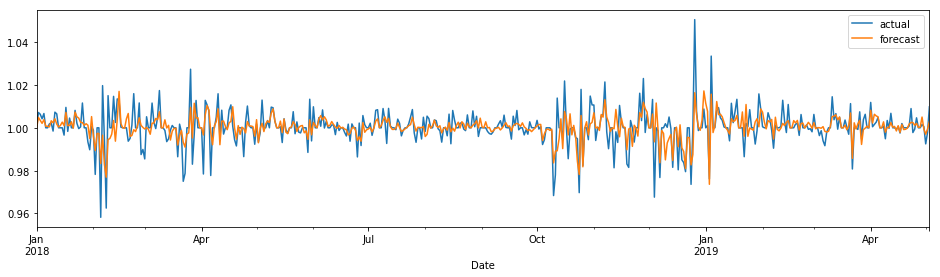

In [48]:
pd.DataFrame({'actual':y_test,'forecast':y_hat}).set_index(df.index[df.index>=threshold]).plot(figsize=(16,4))